In [4]:
import networkx as nx

# Puntos de articulación

Dada una gráfica $G$, decimos que un vértice $v$ es un punto de articulación si al removerlo, se incrementa el número de componentes conexas de $G$.

Un algoritmo ingenuo para determinar si un vértice es de articulación o no es el siguiente:

1. Calcular el número de componentes conexas de $G$.
2. Para cada vértice $v\in V$:
    1. Crear una copia de $G$, llamada $G'$.
    2. Remover $v$ de $G'$.
    3. Calcular el número de componentes conexas de $G'$.
    4. Si el número de componentes de $G'$ es mayor que el de $G$, entonces $v$ es de articulación.
    
Sabemos que el número de componentes conexas de una gráfica puede obtenerse en $O(m+n)$, donde $m$ es el número de aristas y $n$ el número de vértices. Por lo tanto, la complejidad del algoritmo anterior es:

$$
O(m+n) + O(n(m+n))\sim O(n(m+n))
$$

# Camino más corto

Una aplicación del ordenamiento topológico es encontrar el camino más corto entre un nodo $s$ y todos los demás en una gráfica con pesos. Para hacerlo, seguimos el siguiente algoritmo:

* $d$: Lista con las distancias mínimas de cada vértice a $s$. Al inicio, $d[v]=\infty$ para toda $v\neq s$, y $d[s] = 0$.
* $p$: $p[u]$ será el predecesor de $u$ en el camino más corto de $v$ a $u$. Al inicio todas sus entradas son vacías.

1. Para cada $u$ en el ordenamiento topológico de la gráfica, empezando de $s$:
    1. Para cada vértice $v$ tal que existe una arista $(u,v)$:
        1. $w\leftarrow \text{peso}(u,v)$
        2. Si $d[v] > d[u] + w$:
            1. $d[v] \leftarrow d[u] + w$
            2. $p[v] \leftarrow u$
        
Este algoritmo solo funciona si revisamos los vértices $u$ en orden topológico, ya que de esta manera vamos actualizando las distancias de manera ordenada.

Copiamos las funciones de la libreta 5 de la Unidad 1, para obtener el ordenamiento topológico:

In [2]:
def postorder_basic(g, v, visited=None, out=None):
    if visited is None:
        visited = [False] * len(g.nodes)
    if out is None:
        out = []
        
    visited[v] = True
    for u in g.adj[v]:
        if not visited[u]:
            postorder_basic(g, u, visited, out)
    out.append(v)
    return out


def postorder(g, v):
    visited = [False] * len(g.nodes)
    out = []
    for v in g.nodes:
        if not visited[v]:
            postorder_basic(g, v, visited, out)
    return out

def reverse_postorder(g, v):
    out = postorder(g, v)
    out = out[::-1]
    return out

Por ejemplo, para la siguiente gráfica:

{(0, 1): Text(0.654508476093664, 0.47552828417802706, '1'),
 (0, 2): Text(0.09549147175227024, 0.2938926307527015, '5'),
 (1, 2): Text(-0.25000005215406573, 0.7694209149307285, '3'),
 (1, 3): Text(-0.25000002235174246, 0.18163562362300228, '2'),
 (1, 4): Text(0.3090170266931363, 2.980232327587373e-08, '10'),
 (3, 4): Text(-0.24999994784593424, -0.7694209149307285, '2')}

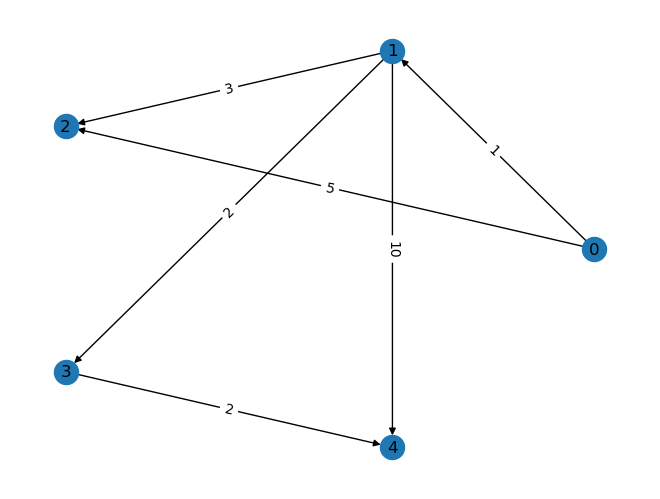

In [5]:
g = nx.DiGraph()
g.add_nodes_from(range(5))
g.add_edges_from([
    (0, 1, {'weight': 1}), 
    (1, 2, {'weight': 3}), 
    (3, 4, {'weight': 2}), 
    (1, 3, {'weight': 2}), 
    (0, 2, {'weight': 5}), 
    (1, 4, {'weight': 10})
])
pos = nx.circular_layout(g)
nx.draw(g, pos=pos, with_labels=True)
labels = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)

In [7]:
def shortest_paths(g, s):
    d = [float('inf')] * len(g.nodes)
    d[s] = 0
    p = [None] * len(g.nodes)
    
    order = reverse_postorder(g, 0)
    idx = order.index(s)
    for u in order[idx:]:
        for v in g.neighbors(u):
            w = g.edges[(u,v)]['weight']
            if d[v] > d[u] + w:
                d[v] = d[u] + w
                p[v] = u
    return p, d
                
p, d = shortest_paths(g, 0)
print(f"Predecesores: {p}")
print(f"Distancias: {d}")

Predecesores: [None, 0, 1, 1, 3]
Distancias: [0, 1, 4, 3, 5]


# Ejercicios

## Ejercicio 1

Encontraste una página del diccionario de una civilización perdida. Los habitantes utilizaban el alfabeto para escribir, pero no necesariamente en el mismo orden; por ejemplo, `b` podía venir antes de `a`. 

Basándote en el hecho de que las palabras del diccionario están ordenadas lexicográficamente, y asumiendo que solo utilizaban las letras provistas, determina el orden del alfabeto.

Como ejemplo, tomamos la lista ordenada `L=["zxx","xxx","xxy"]`. Vemos que la primera palabra empieza con `z`, mientras que las otras dos empiezan con `x`. Por lo tanto, la primera letra del alfabeto es `z`. Por otro lado, las últimas dos palabras empiezan con `xx`, pero la segunda tiene una `x`, y la tercera una `y`. Por lo tanto, `x` viene antes de `y` en el alfabeto.

De esta manera, concluimos que el alfabeto es `zxy`.

*Hint:* Si representas las letras como vértices de una gráfica, de modo que una arista entre `X` y `Y` indica que `X` viene antes que `Y`, lo único que tienes que hacer es encontrar un ordenamiento topológico. Piensa entonces cómo traducir las palabras que te dan a dicha gráfica.

*Aquí va la explicación de tu algoritmo*

In [11]:
# Aquí va tu código
def dictionary_sort(L):
    None

Prueba tu código con la siguiente celda:

In [18]:
L = ["zxy", "zxw","vx","vyy","xwyy"]
res = dictionary_sort(L)
print(f"Ordenamiento esperado: [z, v, x, y, w]. Obtenido: {res}")

L = ["xyy","yxzw","yxzy","zyx","zyw"]
res = dictionary_sort(L)
print(f"Ordenamiento esperado: [x, w, y, z]. Obtenido: {res}")

Ordenamiento esperado: [z, v, x, y, w]. Obtenido: None
Ordenamiento esperado: [x, w, y, z]. Obtenido: None
